# Movie Industry Analysis 
## Part II - Data Exploration
---
This personal project was undertaken in order for me to become comfortable using Pandas for larger data sets and also for practicing basic machine learning tasks. 

It consists of Three Different Notebooks: 

* **Part I   - Data Preparation**
* **Part II  - Data Exploration (This Notebook)**
* **Part III - Predictions with Machine Learning**

The data mining process is followed througout the project, both on a large scale and in Parts II & III on a case by case basis. The steps are: 

1. Defining the Objective
2. Data Preparation
3. Data Exploration
4. Building (or Choosing) a Model
5. Evaluating Model Results

---
## 1. Defining the Objective
The overall objective of this project is to predict which directors will give a movie the best possible IMDB score for any given target year (between 1930 and 2015) using the prior 10 years worth of data for analysis.

---
## 2. Population Analysis
The population data was prepared in Part I.

Note that the data is a hypothetical population used just for this project as I do not have access to all metrics possible through IMDB.

Samples are going to be created from the population in increments of 10 years prior to the test year in question in order to provide enough past data to (hopefully) make a decent prediction.

When creating the samples, there are a couple of assumptions being made:
1. That the average IMDB score is valid for determining a movies success
2. That the overall number of IMDB score votes are valid for determining a movies success

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', 15)

pop = pd.read_csv('data/movies_final.csv')
print(pop.shape)
pop.head(2)

(177095, 12)


,mov_id,title,genre,year,director,dir_dth_yr,actr1,actr2,actr3,runtime,imdb_score,num_scores
0,tt0001184,Don Juan de Serrallonga,Drama,1910,Alberto Marro,1956,Dolores Puchol,Cecilio Rodriguez de la Vega,NaN,58,3.1,11
1,tt0001258,The White Slave Trade,Drama,1910,August Blom,1947,Ellen Diedrich,Victor Fabian,Julie Henriksen,45,5.7,79


## Population Descriptive Stats

In [5]:
print(f'Descriptive Statistics: \n{round(pop.describe(),1)}')
print()
print(f'Correlation Coefficients: \n{pop.corr()}')

Descriptive Statistics: 
           year  dir_dth_yr   runtime  imdb_score  num_scores
count  177095.0    177095.0  177095.0    177095.0    177095.0
mean     1989.5      7406.8      96.4         6.0      4482.0
std        26.2      3747.8      33.9         1.3     36582.3
min      1910.0      1913.0      40.0         1.0         5.0
25%      1971.0      2007.0      85.0         5.3        22.0
50%      1998.0      9999.0      93.0         6.2        84.0
75%      2012.0      9999.0     105.0         6.9       440.0
max      2020.0      9999.0   10062.0        10.0   2210134.0

Correlation Coefficients: 
                year  dir_dth_yr   runtime  imdb_score  num_scores
year        1.000000    0.776734  0.123503   -0.095100    0.055159
dir_dth_yr  0.776734    1.000000  0.075582   -0.092381    0.054621
runtime     0.123503    0.075582  1.000000    0.101533    0.071592
imdb_score -0.095100   -0.092381  0.101533    1.000000    0.104773
num_scores  0.055159    0.054621  0.071592    0.104773

---
## IMDB Score Variable
I first examine 'imdb_score' as this variable is the lynchpin to my analysis. It represents the average user rated score per movie and has a scale from 1.0 - 10.0

In [6]:
print(round(pop['imdb_score'].describe(), 1))
print()
print(stats.describe(pop['imdb_score']))

count    177095.0
mean          6.0
std           1.3
min           1.0
25%           5.3
50%           6.2
75%           6.9
max          10.0
Name: imdb_score, dtype: float64

DescribeResult(nobs=177095, minmax=(1.0, 10.0), mean=5.986600976876817, variance=1.5711926742748537, skewness=-0.6086002665985205, kurtosis=0.49374072752223164)


**Based on the descriptive stats above, the IMDB score distribution appears to be relatively normal as the mean and median are close together (6.0 and 6.2 respectively). There appears to be a slight left skew based on the median > mean and skewness -0.6**

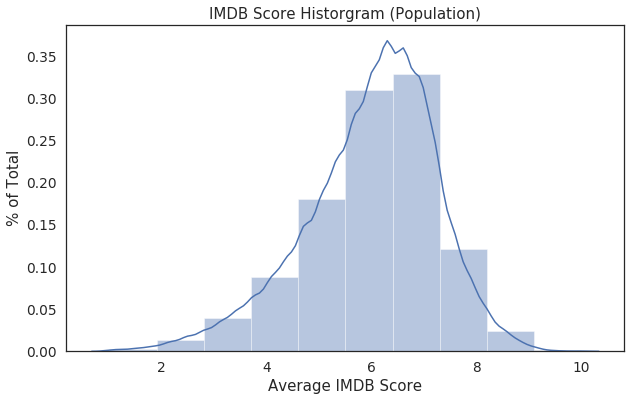

In [12]:
sns.set(style="white", font_scale=1.25)
fig = plt.subplots(figsize=(10,6))

ax = sns.distplot(pop['imdb_score'], bins=10).set_title('IMDB Score Historgram (Population)')

plt.xlabel('Average IMDB Score')
plt.ylabel('% of Total')
plt.show()

**The historgram above shows that the distribution is fairly normal, there is a slight left skew due to a disproportionate amount of lower scores, but this is not an unexpected outcome in my opinion and is not cause for alarm**

## Test 1: Calculate mean of sample means & the mean of sample standard devations for the 'imdb_score' variable
Because I have 86 possible samples in in my analysis, I can use the average of sample means in order to get a better idea of the mean population and the average of sample standard deviations for mean population standard deviation.

In [3]:
def avg_of_sample_means():
    averages = []
    std = []
    
    # All Possible Target Years
    tgt_years = pop['year'][(pop['year'] >= 1930) &
                            (pop['year'] <= 2015)].unique().tolist()
    tgt_years.sort()
    
    print(f'Number of Years Tested: {len(tgt_years)}')

    for yr in tgt_years:    
        sample = pop[(pop['year'] >= yr-20) & (pop['year'] <= yr+4)]
        averages.append(round(sample["imdb_score"].mean(),1))
        std.append(round(sample["imdb_score"].std(),1))
        
    avg_means = sum(averages) / len(tgt_years)
    print(f'Average of All Sample Means: {round(avg_means, 1)}')
    
    avg_std = sum(std) / len(tgt_years)
    print(f'Average of All Sample Standard Deviations: {round(avg_std, 1)}')

avg_of_sample_means()

Number of Years Tested: 86
Average of All Sample Means: 6.1
Average of All Sample Standard Deviations: 1.1


## Test 1 Conclusions:
* Approximate Population Mean IMDB Scores:   6.1
* Approximate Population STD of IMDB Scores: 1.1


* Movies with an average IMDB score > 6.1 are more successful than 50% of all movies.
* Movies with an average IMDB score > 7.2 are more successful than 68% of all movies.
* Movies with an average IMDB score > 8.3 are more successful than 95% of all movies. 
* Movies with an average IMDB score > 9.4 are more successful than 99.7% of all movies.

---
## IMDB Number of Scores Variable
The 'num_scores' variable contains the actual number of user votes used to calculate the average IMDB Score per movie. 

In [19]:
print(round(pop[['imdb_score', 'num_scores']].describe(),1))
print()
print(stats.describe(pop[['imdb_score', 'num_scores']]))
print()
print(pop[['imdb_score', 'num_scores']].corr())

       imdb_score  num_scores
count    177095.0    177095.0
mean          6.0      4482.0
std           1.3     36582.3
min           1.0         5.0
25%           5.3        22.0
50%           6.2        84.0
75%           6.9       440.0
max          10.0   2210134.0

DescribeResult(nobs=177095, minmax=(array([1., 5.]), array([1.000000e+01, 2.210134e+06])), mean=array([   5.98660098, 4482.02914255]), variance=array([1.57119267e+00, 1.33826718e+09]), skewness=array([-0.60860027, 20.92158035]), kurtosis=array([4.93740728e-01, 6.64868155e+02]))

            imdb_score  num_scores
imdb_score    1.000000    0.104773
num_scores    0.104773    1.000000


**The first thing that jumps out is that 'num_scores' has a massive range (not surprising) from 5 to 2.2 million. Furthermore, the median number of votes is 84 which means that roughly 75k titles have < 84 votes. The skew of 20 and kurtosis of 664 show that the data set is highly postively skewed with a large number of outliers**

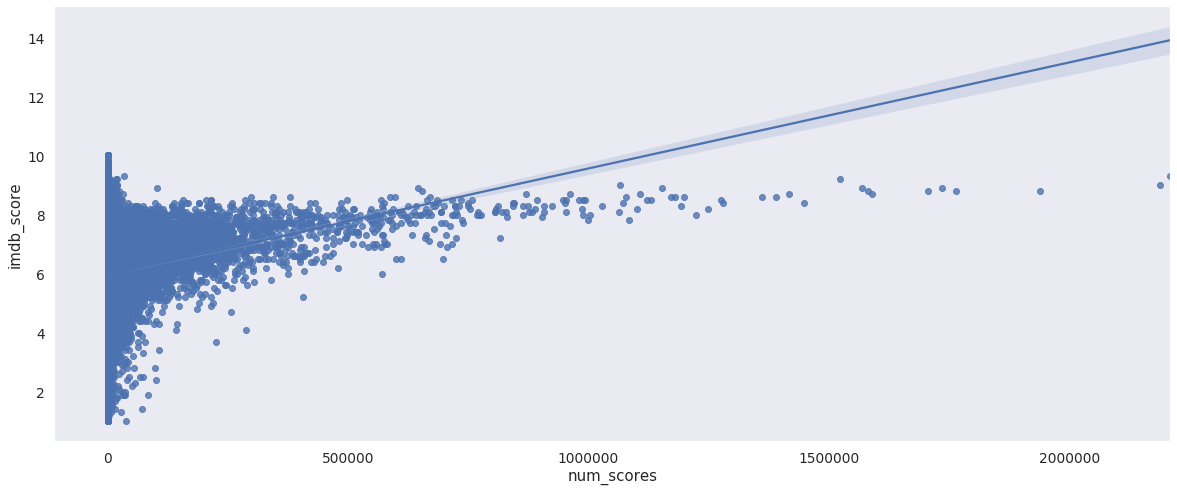

In [23]:
sns.set(style='dark', font_scale=1.25)
fig = plt.subplots(figsize=(20,8))
sns.regplot(x=pop['num_scores'], y=pop['imdb_score'], data=pop);

**The scatter plot shows that the higher (outlier) scores counts (approximatley > 100k) appear to have higher average scores than those below. Yet, there is very little correlation being shown from the correlation coefficient (0.10) which is not what I would expect to see**

**Because of this, I re-test checking the stats for the imdb_scores < 100k and > 100k, with the expectation that the scores > 100k will be higher on average**

## Test 2: Check if extreme outliers for the 'num_counts' variable result in higher average IMDB Scores

In [24]:
print('Scores with > 100k Votes')
print(round(pop[pop['num_scores'] >= 100_000].describe(),1))
print()
print('Scores with < 100k Votes')
print(round(pop[pop['num_scores'] < 100_000].describe(),1))

Scores with > 100k Votes
         year  dir_dth_yr  runtime  imdb_score  num_scores
count  1804.0      1804.0   1804.0      1804.0      1804.0
mean   2002.9      9258.6    116.2         7.1    272211.0
std      14.3      2318.8     21.5         0.8    230605.7
min    1921.0      1949.0     64.0         3.4    100023.0
25%    1999.0      9999.0    101.0         6.5    133382.0
50%    2007.0      9999.0    114.0         7.2    192974.0
75%    2012.2      9999.0    128.0         7.7    316759.0
max    2019.0      9999.0    238.0         9.3   2210134.0

Scores with < 100k Votes
           year  dir_dth_yr   runtime  imdb_score  num_scores
count  175291.0    175291.0  175291.0    175291.0    175291.0
mean     1989.4      7387.7      96.2         6.0      1726.7
std        26.3      3755.0      34.0         1.3      7731.4
min      1910.0      1913.0      40.0         1.0         5.0
25%      1971.0      2007.0      84.0         5.2        21.0
50%      1998.0      9999.0      93.0         

## Test 2 Conclusions:
* Movies with 'num_scores' > 100k have aveage IMDB scores 1.1 points or 18.3% higher than those movies with less than 100k votes.  

These results makes sense as extremely popular movies should have more viewers than less popular movies and therefore should posses a larger pool of potential individuals to rate a given movie on IMDB.

---
## Runtime Variable
The 'runtime' variable represents the length in minutes of a particular movie. 

In [26]:
print(round(pop[['runtime','imdb_score']].describe(),1))
print()
print(stats.describe(pop[['runtime','imdb_score']]))
print()
print(pop[['runtime','imdb_score']].corr())

        runtime  imdb_score
count  177095.0    177095.0
mean       96.4         6.0
std        33.9         1.3
min        40.0         1.0
25%        85.0         5.3
50%        93.0         6.2
75%       105.0         6.9
max     10062.0        10.0

DescribeResult(nobs=177095, minmax=(array([40.,  1.]), array([1.0062e+04, 1.0000e+01])), mean=array([96.35768938,  5.98660098]), variance=array([1152.21775535,    1.57119267]), skewness=array([145.37129009,  -0.60860027]), kurtosis=array([4.20186225e+04, 4.93740728e-01]))

             runtime  imdb_score
runtime     1.000000    0.101533
imdb_score  0.101533    1.000000


**The 'runtime' data appears to have a wide range, much larger than expected. the max value is 10,062 minutes which tells me that something is not right with at least that data point. Because the mean and median are relatively close together, I suspect that these high outliers are the cause for the high skew.**

## Test 3: Check if Runtime Effects Average IMDB Score
First I perform a quck outlier test by pulling all the rows where the runtime is > 3 standard devations from the mean. I use 210 minutes because this is close to the 3 std amount and I would suspect that the vast majority of movies are shorter than 3.5 hours. 

In [32]:
print(f'Population Count: {pop.shape}')
print(f'Runtime Count: {pop[pop["runtime"] > 210].shape}')

Population Count: (177095, 12)
Runtime Count: (449, 12)


**Only 449 movies out of 177,000 or 0.002% of the total are longer than 3.5 hours, therefore I remove them and retest to see if these outliers were the cause of the skewed data.**

In [33]:
print(round(pop[pop['runtime'] <= 210].describe()))
print()
print(stats.describe(pop['runtime'] <= 210))

           year  dir_dth_yr   runtime  imdb_score  num_scores
count  176646.0    176646.0  176646.0    176646.0    176646.0
mean     1990.0      7414.0      96.0         6.0      4484.0
std        26.0      3745.0      21.0         1.0     36606.0
min      1910.0      1913.0      40.0         1.0         5.0
25%      1971.0      2007.0      85.0         5.0        22.0
50%      1998.0      9999.0      93.0         6.0        84.0
75%      2012.0      9999.0     105.0         7.0       440.0
max      2020.0      9999.0     210.0        10.0   2210134.0

DescribeResult(nobs=177095, minmax=(False, True), mean=0.9974646376238742, variance=0.002528948593928193, skewness=-19.78442511721795, kurtosis=389.42347721880395)


In [34]:
pop[pop['runtime'] <= 210].corr()

,year,dir_dth_yr,runtime,imdb_score,num_scores
year,1.000000,0.776352,0.216835,-0.095212,0.055240
dir_dth_yr,0.776352,1.000000,0.135237,-0.092167,0.054761
runtime,0.216835,0.135237,1.000000,0.144236,0.116139
imdb_score,-0.095212,-0.092167,0.144236,1.000000,0.104752
num_scores,0.055240,0.054761,0.116139,0.104752,1.000000


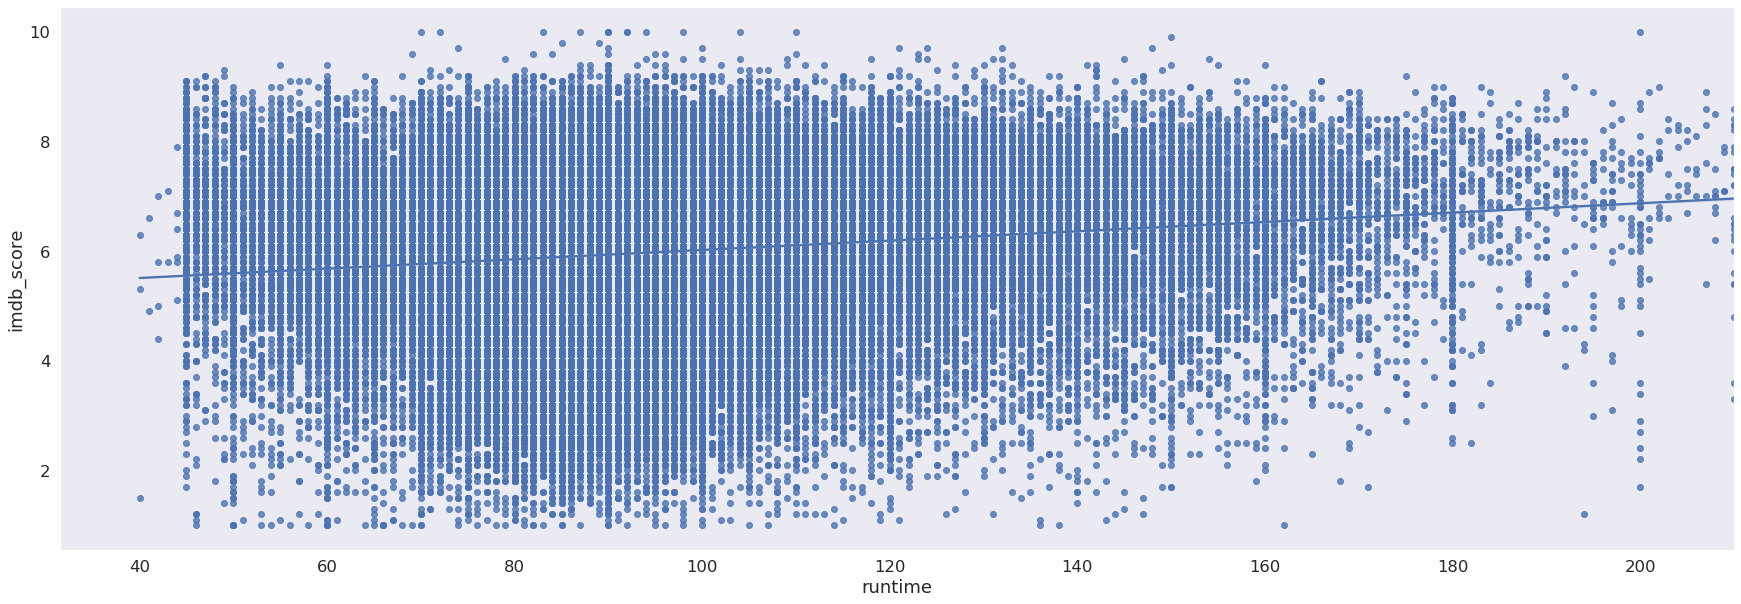

In [16]:
sns.set(style="dark", font_scale=1.5)
fig = plt.subplots(figsize=(30,10))
sns.regplot(x="runtime", y="imdb_score", data=pop[pop['runtime'] <=210])

**After removing the outliers, the correlation between runtime and imdb_scores increased slightly from 0.10 to 0.14, furthermore the distribution is now approximately symmetric. Thus indicating that the oultiers were causing the skew**

**Because of the skew, I split the runtime data at the 75th percentile and compare the imdb_score means. It turns out that movies > 1.5 hours in length tend to have scores half a point higher on average.**

In [35]:
print('Movie length >= 105 minutes ')
print(round(pop[pop['runtime'] >= 105].describe(),1))
print()
print('Movie length < 105 minutes')
print(round(pop[pop['runtime'] < 105].describe(),1))

Movie length >= 105 minutes 
          year  dir_dth_yr  runtime  imdb_score  num_scores
count  44784.0     44784.0  44784.0     44784.0     44784.0
mean    1995.7      7953.9    125.3         6.4     11372.0
std       22.0      3491.1     54.8         1.2     65556.5
min     1912.0      1916.0    105.0         1.0         5.0
25%     1982.0      2019.0    110.0         5.8        34.0
50%     2004.0      9999.0    118.0         6.5       178.0
75%     2013.0      9999.0    134.0         7.1      1230.0
max     2020.0      9999.0  10062.0        10.0   2210134.0

Movie length < 105 minutes
           year  dir_dth_yr   runtime  imdb_score  num_scores
count  132311.0    132311.0  132311.0    132311.0    132311.0
mean     1987.4      7221.6      86.6         5.9      2149.9
std        27.2      3813.1      12.0         1.3     17751.2
min      1910.0      1913.0      40.0         1.0         5.0
25%      1968.0      2003.0      81.0         5.1        19.0
50%      1995.0      9999.0    

## Test 3 Conclusions:
* Movies longer than 105 minutes in length have an average IMDB score 0.5 points higher than movies shorter than 105 minutes in length.

## Total Movie Titles Per Decade

In [43]:
decade = 10 * (pop['year'] // 10)
pop['decade'] = decade

# In this case I use groupby because I want to see the decades in ascending order
pop.groupby('decade')['year'].count().to_frame(name='titles')

# I could have used value_counts, but it puts the title counts in descending order
# which makes the years become out of order
#pop['decade'].value_counts().to_frame(name='titles')

,titles
decade,
1910,779
1920,2448
1930,7732
1940,7585
1950,10346
1960,13079
1970,15229
1980,16328
1990,17671


**There are an adequate number of movies per decade. Because my initial algorithm is going to use 10 years of data prior to the target date, the entire possible target date range is 1930 - 2015**

---
# 3. Data Exploration & Descriptive Statistics
In this section, I create a sample template and perform mulitple exploratory case studies on it in order to help with my predictive algorithm creation.

### Creating the Sample
My template sample has the target year of 2000 which means it uses the years from 1990 - 1999 as its 10 years of predictive data. I also remove movies with runtime > 3.5 hours

In [3]:
s1 = pop.copy()

s1_target = 2000 # Target Year
s1_minyr = 1990  # (s1_target - 10)
s1_maxyr = 1999  # (s1_target -1)

# Create DataFrame with only target year range (1990 - 1999)
s1 = s1[(s1['year'] >= s1_minyr) & (s1['year'] <= s1_maxyr)]
print(f'Initial Sample Size: {s1.shape}')

# Remove all outlier films with runtimes > 3.5 hours
s1 = s1[s1['runtime'] <= 210]
print(f'Sample Size After Runtime Outliers Removed: {s1.shape}')

Initial Sample Size: (17671, 12)
Sample Size After Runtime Outliers Removed: (17645, 12)


In [4]:
print(s1.describe().round(decimals=1))
print()
print(s1.corr())

          year  dir_dth_yr  runtime  imdb_score  num_scores
count  17645.0     17645.0  17645.0     17645.0     17645.0
mean    1994.7      8869.7    100.1         5.9      7086.3
std        2.9      2783.4     21.1         1.2     53942.2
min     1990.0      1934.0     45.0         1.0         5.0
25%     1992.0      9999.0     89.0         5.1        31.0
50%     1995.0      9999.0     95.0         6.0       124.0
75%     1997.0      9999.0    107.0         6.8       618.0
max     1999.0      9999.0    210.0         9.6   2210134.0

                year  dir_dth_yr   runtime  imdb_score  num_scores
year        1.000000    0.134515 -0.002250   -0.012622    0.028240
dir_dth_yr  0.134515    1.000000 -0.066009   -0.009929    0.021578
runtime    -0.002250   -0.066009  1.000000    0.191876    0.115653
imdb_score -0.012622   -0.009929  0.191876    1.000000    0.146892
num_scores  0.028240    0.021578  0.115653    0.146892    1.000000


**The sample statsitics are pretty much in line with the population, therefore I proceed with case by case analysis.**

## Movie Titles Per Year

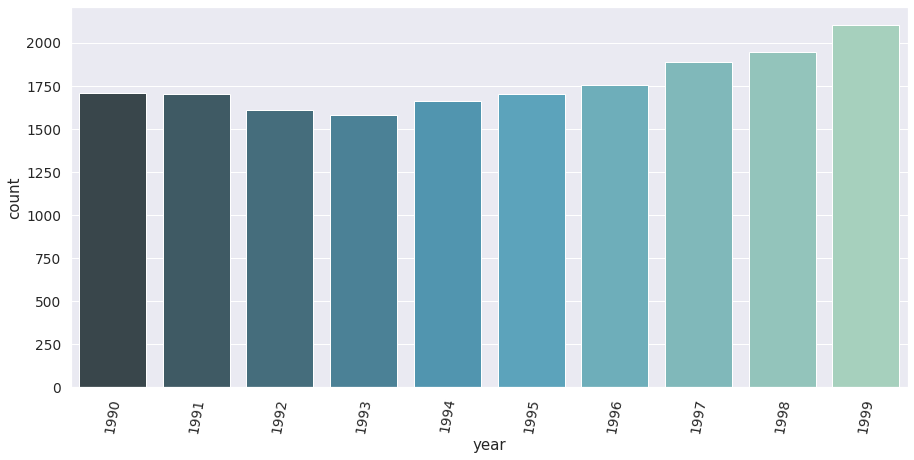

In [5]:
sns.set(style="darkgrid", font_scale=1.25)
fig = plt.subplots(figsize=(15,7))

# use x for vertical bars, y for horizontal bars
ax = sns.countplot(x='year', data=s1, palette='GnBu_d')

plt.xticks(rotation=80)
plt.show()

**This chart shows that all years in the sample contain a relatively uniform number of movies per year which is ideal.**

---
## Case 1: Genre Count
* **Objective** - Get a better idea of the genre breakdown
* **Data Points** - (x = 'genre'), (y= title count per genre)
* **Analysis Type** - Vertical & Horizontal Bar Charts

### First, I pull the population title count by genre to use as a comparison with the sample

In [6]:
cnt_df = pop['genre'].value_counts().to_frame(name = 'titles')
cnt_df['pct'] = round(pop['genre'].value_counts() / 
                      pop['genre'].value_counts().sum() * 100, 1)
cnt_df

,titles,pct
Drama,82882,46.8
Comedy,48843,27.6
Action,24424,13.8
Horror,13099,7.4
Family,7847,4.4


### Next I get the sample title count by genre

In [7]:
cnt_df = s1['genre'].value_counts().to_frame(name = 'titles')
cnt_df['pct'] = round(s1['genre'].value_counts() / 
                      s1['genre'].value_counts().sum() * 100, 1)
cnt_df

,titles,pct
Drama,7935,45.0
Comedy,4933,28.0
Action,3022,17.1
Horror,940,5.3
Family,815,4.6


### Bar Chart
In this example, a subset of the data was used including just the genre and title columns. Doing this allowed the use of groupby() for counting the titles by genre and also allowed for sorting by total count value. 

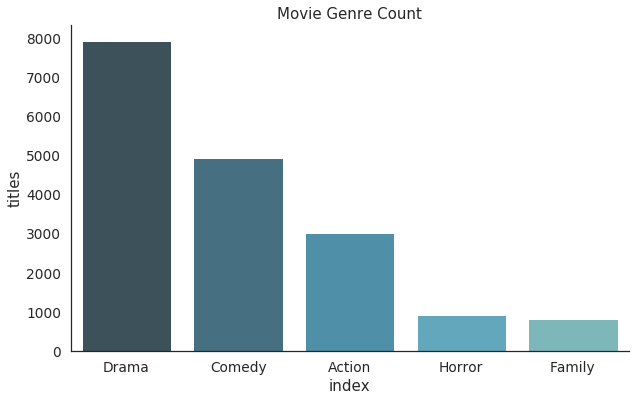

In [8]:
bar1 = cnt_df.reset_index()

# Set chart style, color palette, and font size
sns.set(style="white", palette='GnBu_d', font_scale=1.25)

# Set chart size
fig = plt.subplots(figsize=(10,6))

# Chart type & settings
ax = sns.barplot(x="index", y="titles", data=bar1).set_title('Movie Genre Count')

# Remove top and right borders
sns.despine(top=True, right=True)

### Countplot Chart
In this example, the counts created through seaborn using the countplot chart. All that was required was the 'genre' column. However, the big difference between this and the chart above is that sorting this chart does so by the genre names and NOT the count values themselves. 

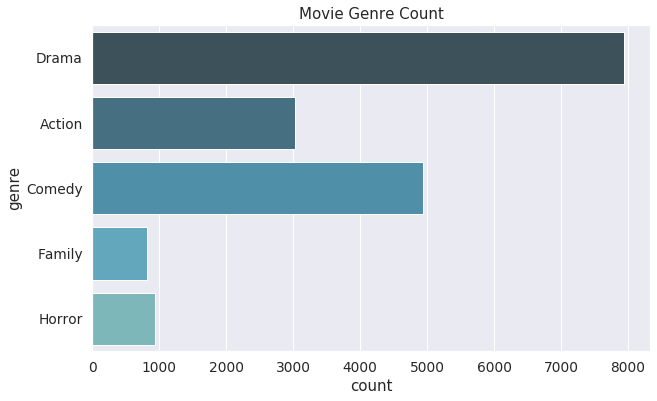

In [9]:
sns.set(style="darkgrid", palette='GnBu_d', font_scale=1.25)
fig = plt.subplots(figsize=(10,6))
ax = sns.countplot(y='genre', data=s1).set_title('Movie Genre Count')

## Case 1 Results:
Approximately 90% of the movies in the sample (and population) are either, Drama, Comedy, or Action. Drama in particular makes up 44% of the total. This would suggest that those particular genres could be the most popular, however this can't be confirmed without also checking the IMDB Score means by genre. 

**Current Algorithm Metrics:**
* **Average IMDB Score = 6.1**
* **Average IMDB Score STD = 1.1**
* **Number IMDB Score Votes > 100k for extremely popular movies**
* **Ideal Movie Length > 105 Minutes**

---
## Case 2: Genre Popularity Based on IMDB Score
* **Objective** - Compare Imdb Scores by Genre in order to see which is most popular
* **Data Points** - (x = 'genre'), (y= 'imdb_score;')
* **Analysis Type** - Descriptive Statistics

### First, I pull the population title mean by genre to use as a comparison with the sample

In [10]:
pop_mean = pop.copy()
pop_mean = pop_mean[(pop_mean['year'] >= 1930) & (pop_mean['year'] <= 2015)]
pop_mean[['genre', 'imdb_score']].groupby('genre').mean()

,imdb_score
genre,
Action,5.721122
Comedy,5.939067
Drama,6.239097
Family,6.121343
Horror,4.974024


### Next I pull the sample mean by genre

In [11]:
smpl_mean = s1.copy()
smpl_mean = smpl_mean[(smpl_mean['year'] >= s1_minyr) & (smpl_mean['year'] <= s1_maxyr)]
smpl_mean[['genre', 'imdb_score']].groupby('genre').mean()

,imdb_score
genre,
Action,5.479351
Comedy,5.883580
Drama,6.162281
Family,5.811043
Horror,5.056064


## Case 2 Results:
Of the five genre types here are the ranks for highers mean IMDB scores:
1. Drama (#1 in both population and sample)
2. Comedy(#2 in sample, #3 in population )
3. Family (#2 in population, #3 in sample)
4. Action (#4 in both population and sample)
5. Horror (#5 in both population and sample)

This analysis shows that for predictive purposes of a movies success, choosing to make Drama film could potentially net higher scores than all the other genre types. Note that family came in second for the population, however, there are only approximately 7K Family movies from 1910 - 2015, therefore I opt to not test that genre.

**Current Algorithm Metrics:**
* **Average IMDB Score = 6.1**
* **Average IMDB Score STD = 1.1**
* **Number IMDB Score Votes > 100k for extremely popular movies**
* **Ideal Movie Length > 105 Minutes**

---
## Case 3: Determine Ideal Directors Per Genre
* **Objective** -  In the title
* **Data Points** - 'title', 'genre', 'director', 'imdb_score', 'num_scores'
* **Analysis Type** - Descriptive Statistics

In [12]:
round(s1.groupby('director').agg({'title':'count','imdb_score':'mean'}).describe(),1)

,title,imdb_score
count,10041.0,10041.0
mean,1.8,5.9
std,1.7,1.2
min,1.0,1.0
25%,1.0,5.1
50%,1.0,6.0
75%,2.0,6.7
max,43.0,9.6


**From the above results, 75% of directors have < 2 movies.**

### I next perform a search based on number of titles and average score

In [13]:
dir1 = s1.copy()

dir1 = round(dir1.groupby('director').agg({'title': 'count',
                                           'imdb_score': 'mean', 
                                           'num_scores' : 'sum'}), 2)

dir1.loc[(dir1['title'] >= 3) & 
         (dir1['imdb_score'] > 6)].sort_values(by='title', ascending=False)

,title,imdb_score,num_scores
director,,,
Jing Wong,43,6.16,51951
Hisayasu Sato,18,6.21,2771
Andrew Lau,17,6.22,11615
Priyadarshan,17,7.18,17394
Hark Tsui,16,6.51,96566
...,...,...,...
Kenji Kodama,3,7.30,4187
Keiichi Hara,3,6.57,717
Katsuyuki Motohiro,3,6.47,719


**The above results were not quite what I expected. Tthe directors with the most titles and highest average IMDB scores are unrecognizable to me. I also notice that the number of total votes for all their movies is not very high in most cases. Because of this, I perform another search based on the number of votes and immediately get back what I was looking for, instantly recognizable names. See Below:**

In [14]:
dir2 = s1.copy()

dir2 = round(dir2.groupby('director').agg({'title': 'count',
                                           'imdb_score': 'mean', 
                                           'num_scores' : 'sum'}),2)

dir2[(dir2['title'] >= 3) & 
     (dir2['imdb_score'] > 6) & 
     (dir2['num_scores'] > 100_000)].sort_values(by='num_scores', ascending=False).head(10)

,title,imdb_score,num_scores
director,,,
Steven Spielberg,6,7.72,3798303
David Fincher,4,7.92,3719443
Quentin Tarantino,3,8.23,2911100
Robert Zemeckis,4,7.55,2427903
James Cameron,3,7.83,2181984
Martin Scorsese,6,7.53,1696621
Luc Besson,4,7.48,1524623
Jonathan Demme,3,7.43,1420431
Joel Coen,3,7.97,1388439


**While the above grouping works for just 'num_scores', I would ideally like to have 'imdb_score' sorted AFTER 'num_scores'**

### In this search I apply all the ideal algorithm metrics so far and sort appropriately:

In [15]:
dir4 = s1.copy()

# Set Genre
dir4 = dir4[dir4['genre'] == 'Drama']       # Target Genre: Drama
dir4 = dir4[dir4['dir_dth_yr'] == 9999]     # Remove dead directors

# Group and Aggregate Desired Columns
dir4 = round(dir4.groupby('director').agg({'title': 'count',  
                                           # This selects the mode, not used because 
                                           # set genre directly
                                           #'genre': lambda x:x.value_counts().index[0], 
                                           'imdb_score': 'mean',
                                           'num_scores' : 'sum'}),2)

# Set Algorithm Limits
dir4 = dir4[(dir4['title'] >= 3) &           # Min number of movies per director
            (dir4['imdb_score'] > 6.1) &     # Min IMDB Score for all directors movies
            (dir4['num_scores'] > 100_000)]  # Min number of votes total per director

# Sort IMDB Scores Largest First
dir4 = dir4.sort_values(by=['imdb_score'], ascending=False)

print(dir4.shape)
print()

# Next Sort IMDB Score
print('Top 10 Drama Directors Per Imdb Score and Score Count:')
dir4.sort_values(by=['imdb_score', 'num_scores'], ascending=[False,True]).head(10)

(28, 3)

Top 10 Drama Directors Per Imdb Score and Score Count:


,title,imdb_score,num_scores
director,,,
Steven Spielberg,3,8.27,2392438
Quentin Tarantino,3,8.23,2911100
Paul Thomas Anderson,3,7.70,545842
Taylor Hackford,3,7.63,378505
Jim Sheridan,3,7.53,171420
Martin Scorsese,6,7.53,1696621
Pedro Almodovar,3,7.40,121516
Rob Reiner,3,7.40,406860
Tom Tykwer,3,7.27,188241


**I now have the top 10 potential directors to choose from, next I empirically test them to see if my predictions actually work by checking my target year + 3 years ahead to see if these directors next movie was a success.** 

**Ideally they all would be successful, but some directors may or may not have made any movies during that time perios OR the next movie may not have been in the same genre.**

### Test the Results Returned from Algorithm

In [16]:
# This function returns the next major film (if any) 
# for all the top 10 target year directors 
def test_directors2(dir_df):
    df = dir_df.copy()
    df = df.iloc[0:10]
    
    result_df = dir_df.copy()
    result_df = df.iloc[0:0]
    
    for d in list(df.index):
        t = pop.copy()
        t = t.drop(columns=['mov_id', 'dir_dth_yr', 'actr1', 'actr2', 'actr3'])
        
        t = t[(t['director'] == d) & 
                (t['year'] >= 2000) & 
                (t['year'] <= 2003)].sort_values(by=['year'], ascending=True).head(1)
        result_df = result_df.append(t)
    return(result_df)
    

results = test_directors2(dir4)

print(f'Number of Results: {len(results)}\n')
print('Drama Result Means: \n--------------------------')
print(results[results['genre'] == 'Drama'].mean())

Number of Results: 10

Drama Result Means: 
--------------------------
imdb_score         7.56
num_scores    164814.00
year            2001.40
runtime          133.00
dtype: float64


In [17]:
results[results['genre'] == 'Drama']

,title,imdb_score,num_scores,genre,year,director,runtime
74623,A.I. Artificial Intelligence,7.2,282048,Drama,2001.0,Steven Spielberg,146.0
75261,Gangs of New York,7.5,387901,Drama,2002.0,Martin Scorsese,167.0
86573,In America,7.7,39623,Drama,2002.0,Jim Sheridan,105.0
84931,Talk to Her,7.9,100650,Drama,2002.0,Pedro Almodovar,112.0
73385,The Princess and the Warrior,7.5,13848,Drama,2000.0,Tom Tykwer,135.0


In [18]:
print('Non-Drama Result Means: \n--------------------------')
print(results[results['genre'] != 'Drama'].mean())

Non-Drama Result Means: 
--------------------------
imdb_score         7.0
num_scores    281223.2
year            2001.6
runtime          111.4
dtype: float64


In [19]:
results[results['genre'] != 'Drama']

,title,imdb_score,num_scores,genre,year,director,runtime
81974,Kill Bill: Vol. 1,8.1,953510,Action,2003.0,Quentin Tarantino,111.0
82728,Punch-Drunk Love,7.3,140021,Comedy,2002.0,Paul Thomas Anderson,95.0
76388,Proof of Life,6.2,53795,Action,2000.0,Taylor Hackford,135.0
88767,Alex & Emma,5.6,12731,Comedy,2003.0,Rob Reiner,96.0
70874,"Crouching Tiger, Hidden Dragon",7.8,246059,Action,2000.0,Ang Lee,120.0


## Case 3 Conclusions:

**Drama Results**
* Mean IMDB score for the drama films was: 7.6
* 5/5 or 100% of the drama films beat the population avearge IMDB Score of 6.1
* 5/5 or 100% of the drama films had a runtime of >= 105 minutes
* 3/5 or 60% of the drama films had a a vote count of > 100k (blockbuster status)

**Non-Drama Results**
* Mean IMDB score for the non-drama films was: 7.0
* 4/5 or 80% of the non-drama films beat the population average IMDB score of 6.1
* 3/5 or 60% of the non-drama films had a runtime of >= 105 minutes
* 3/5 or 60% of the non-drama films had a a vote count of > 100k (blockbuster status)

The results for the single template sample are striking. Of the top 10 drama directors chosen from the algorithm, all 10 made a movie within 3 year of the target year. Of the movies made, half were dramas. The dramas met all the criteria set in the algorithm for a good movie, with the exception that two of the films did not have > 100k votes. This means that 13/15 or 86.7% of all metrics passed. 

The directors who chose not to make dramas (remember they were originally selected as the best drama directors) did not fare as well as they only met 10/15 total metrics or 66.7% success rate. 

Overall, all the films (regardless of genre) except 1 beat the average IMDB score rating of 6.1.

---
### Final Test Algorithm Metrics:
* **Average IMDB score = 6.1**
* **Average IMDB score STD = 1.1**
* **Number IMDB score votes > 100k for extremely popular movies**
* **Ideal movie length > 105 minutes**
* **Ideal Genre: Drama**
* **Ideal director must have at least 3 movies over past 20 years**
* **Test Top 10 directors (with highest IMDB score, vote count ratio over 20 yr period)**

---
## Due to the success of my initial test, I next test the entire analysis range from 1930 - 2015 by genre

# Sample Object Creation
This class is created for each individual target year sample.

In [3]:
class Sample:
    def __init__(self, pop, tgt_lst):
        self.pop = pop                                    # Population data
        self.tgt_yr = tgt_lst['year']                     # Target year
        self.start_yr = (self.tgt_yr - 10)                # Analysis start year
        self.end_yr = (self.tgt_yr - 1)                   # Analysis end year
        self.tgt_score = tgt_lst['imdb_score']            # Target imdb score
        self.tgt_avg_score = tgt_lst['avg_score']         # Target avg score per movie
        self.tgt_min_titles = tgt_lst['min_titles']       # Min # of titles per director
        self.tgt_genre = tgt_lst['genre']                 # Target genre
        
        self.smpl = pop[(pop['year'] >= self.start_yr) &  # Date Range (1930 -2015)
                         (pop['year'] <= self.end_yr)]     

        
        '''Creates DataFrame with top directors from target year (max of 10)'''
        def findDirectors(self):
            dir_df = self.smpl.copy()
            
            # Only keep movies with target genre
            dir_df = dir_df[dir_df['genre'] ==  self.tgt_genre] 
            
            # Remove dead directors >= to target year
            dir_df = dir_df[(dir_df['dir_dth_yr'] >= self.tgt_yr) | 
                            (dir_df['dir_dth_yr'] == 9999)]

            # Group and aggregate desired columns
            dir_df = round(dir_df.groupby('director').agg({'title': 'count',
                                                           'imdb_score': 'mean',
                                                           'num_scores' : 'sum'}), 2)
            
            # Calculate average number of votes per director based on number of total titles
            dir_df['avg_score_per_movie'] = round(dir_df['num_scores'] / dir_df['title'],1)
            
            # Apply algorithm limits
            dir_df = dir_df[(dir_df['imdb_score'] > self.tgt_score) &
                            (dir_df['title'] >= self.tgt_min_titles) &
                            (dir_df['avg_score_per_movie'] > self.tgt_avg_score)]
            
            # Sort Columns
            # First, sort by 'avg_score_per_movie' (Largest values first)
            dir_df = dir_df.sort_values(by=['avg_score_per_movie'], ascending=False)

            # Next sort by 'imdb_score' AND keep 'avg_score_per_movie' in descending order
            # limit total possible results to max 10
            dir_df = dir_df.sort_values(by=['imdb_score', 'avg_score_per_movie'], 
                                        ascending=[False, True]).head(10)
            return dir_df
        
        self.tgt_directors = findDirectors(self)
 

    '''Tests the top 10 directors to see if next movie released was a hit'''      
    def testDirectors(self):
        # Create empty DataFrame for results from existing sample
        result_df = self.tgt_directors
        result_df = result_df.drop(columns='avg_score_per_movie')
        result_df = result_df.iloc[0:0]

        pop = self.pop.drop(columns=['mov_id', 'dir_dth_yr', 'actr1', 'actr2', 'actr3'])

        for d in list(self.tgt_directors.index):
            test = pop[(pop['director'] == d) & 
                       (pop['year'] >= self.tgt_yr + 1) & 
                       (pop['year'] <= self.tgt_yr + 3)].sort_values(by=['year'], ascending=True).head(1)
            result_df = result_df.append(test)

        if len(result_df) != 0:
            result_df = result_df[result_df['genre'] == self.tgt_genre]
            result_df = result_df.reindex(columns=['director', 'title','imdb_score', 'num_scores'])

            result_df['test_results'] = ((result_df['imdb_score'] > self.tgt_score) & 
                                         (result_df['num_scores'] > self.tgt_avg_score))

            print(f'\nTop {self.tgt_genre} Director Results for {self.tgt_yr}')
            print('---------------------------------------------')
            print(result_df)
            #print()
            return result_df['test_results'].tolist()
        else:
            print(f'\nTop {self.tgt_genre} Director Results for {self.tgt_yr}')
            print('---------------------------------------------')
            print(f'No Results Returned for {self.tgt_yr}\n\n')
            return []
 

    '''Prints Sample Details'''
    def getInfo(self):
        if self.tgt_yr >= 1930 and self.tgt_yr <= 2015:
            print('\n----------------------------------------------------')
            print('Sample Details:')
            print('----------------------------------------------------')
            print(f'Sample Size: {self.smpl.shape}')
            print(f'Target Year: {self.tgt_yr}')
            print(f'Analysis Start Year: {self.start_yr}')
            print(f'Analysis End Year: {self.end_yr}')
            print(f'Target Genre: {self.tgt_genre}\n')
        else:
            print(f'Target year {self.tgt_yr} not valid, use range: >= 1930 and <= 2015.')
        
        
    '''Returns Top Director Dataframe'''
    def getDirectors(self):
        if self.tgt_yr >= 1930 and self.tgt_yr <= 2015:
            print(f'Number of Top Directors: {len(self.tgt_directors)}\n')
            print(f'Best Directors for Target Year: {self.tgt_yr}')
            print('----------------------------------------------------')
            print(f'{self.tgt_directors}\n')
            return(self.tgt_directors)
        else:
            print(f'Target year {self.tgt_yr} not valid, use range: >= 1930 and <= 2015.')
    
    '''Returns Target Years Descriptive Statistics'''
    def getStats(self):
        # Remove runtime outliers to prevent skew
        if self.tgt_yr >= 1930 and self.tgt_yr <= 2015:
            self.desc_stats = self.smpl[self.smpl['runtime'] < 210]        
            print('Sample Descriptive Statistics:')
            print(f'{self.desc_stats.describe().round(decimals=1)}\n')
            return(self.desc_stats.describe().round(decimals=1))
        else:
            print(f'Target year {self.tgt_yr} not valid, use range: >= 1930 and <= 2015.')

# Test Code

In [4]:
def runTest(pop, date_range, targets):
    pop = pop.copy()
    total_dir_samples = 0
    total_dir_results = 0
    total_pass   = 0
    success_rate = 0
    
    for yr in date_range:  
        targets.update({'year' : yr})

        # Logic used to determine minimun number of votes for movie based on time period
        # Note, this had to be lowered as older movies just didn't have enough votes. 
        if (yr <= 1945) : targets.update({'avg_score' : round(targets['num_votes'] * 0.075)})
        elif ((yr > 1945) & (yr < 1957)):  targets.update({'avg_score' : round(targets['num_votes'] * 0.25)})
        elif ((yr >= 1957) & (yr < 1980)): targets.update({'avg_score' : round(targets['num_votes'] * 0.3)})
        elif ((yr >= 1980) & (yr < 2000)): targets.update({'avg_score' : round(targets['num_votes'] * 0.6)})
        else : targets.update({'avg_score' : targets['num_votes']})
        #targets.update({'avg_score' : targets['num_votes']})
            
        sample = Sample(pop, targets)         # Create sample object
        sample.getInfo()                      # Get sample information
        
        dir_samples = sample.getDirectors()   # Get top directors from target year sample
        dir_results = sample.testDirectors()

        total_dir_samples += len(dir_samples) # Count of top directors found
        total_dir_results += len(dir_results) # Results of top directors next movies
        total_pass += sum(dir_results)        # Only sums True values
          
    print('\n\n---------------------------------------')
    print(f'Overall Test Results')
    print('---------------------------------------')
    print(f'Total Top Directors: {total_dir_samples}')
    print(f'Director Results Found: {total_dir_results}')
    print(f'Total Passed:  {total_pass}')
    print(f'Total Failed:  {total_dir_results - total_pass}')
    print(f'Success Rate:  {total_pass/total_dir_results * 100}%')
            
        
def main():
    pop = pd.read_csv('data/movies_final.csv')
    #date_range = pop['year'][(pop['year'] >= 1930) & (pop['year'] <= 2015)].unique().tolist()
    #date_range.sort()
    date_range = [2015]
    
    targets = {'imdb_score': 6.1,              
               'min_titles' : 3,
               'num_votes' : 10_000,
               'genre': 'Action'}
    
    runTest(pop, date_range, targets)

start = time.time()
main()
print(f'Time Completed: {round(time.time() - start, 2)} Seconds.')


----------------------------------------------------
Sample Details:
----------------------------------------------------
Sample Size: (43779, 12)
Target Year: 2015
Analysis Start Year: 2005
Analysis End Year: 2014
Target Genre: Action

Number of Top Directors: 10

Best Directors for Target Year: 2015
----------------------------------------------------
                   title  imdb_score  num_scores  avg_score_per_movie
director                                                             
Christopher Nolan      4        8.60     6824931            1706232.8
Vishal Bhardwaj        3        7.87       81619              27206.3
Matthew Vaughn         3        7.67     1707078             569026.0
S. Shankar             3        7.60       53479              17826.3
Keishi Ohtomo          3        7.57       37656              12552.0
Peter Jackson          3        7.47     1415877             471959.0
Gareth Evans           3        7.43      301187             100395.7
Clint Eastwoo

# Tests
All of the tests use at least these metrics:
* All target years tested from 1930 - 2015
* Minimun IMDB Score allowed to pass: > 6.1
* Minimum number of movies allowed per director: 3 
* Genres tested (Drama, Comedy, Action)

---

### Test 1 - Initial naive hypothesis where only overall IMDB score determines a movies success:
* 1 metric used: ('imdb_scores' > 6.1)

* **Drama: 93.07%**  (or 376 out of 404 directors next movie score > 6.1) 
* **Comedy: 86.68%** (or 319 out of 368 directors next movie score > 6.1)
* **Action: 83.11%** (or 251 out of 302 directors next movie score > 6.1)

The model did a really good job in picking out directors whose next movie had an above average IMDB score. However, without taking votes counts into consideration its really impossible to know if a movie was really popular. Next I added in the 'num_scores' variable in order to see if the high IMDB scores reflected high vote counts

---

### Test 2 - Initial naive hypothesis with two metrics using 100k as min for blockbuster status:
* 2 metrics: ('imdb_scores' > 6.1) & ('num_scores' > 100_000)


* **Drama:  44.37%** (or 67 out of 151 directors next movie score > 6.1 and votes > 100k) 
* **Comedy: 53.47%** (or 54 out of 101 directors next movie score > 6.1 and votes > 100k)
* **Action: 65.41%** (or 87 out of 133 directors next movie score > 6.1 and votes > 100k)

The Drama and Comdey results were less than stellar with 44.37% and 53.47 pass rates respectively. Action actually had a decent rate. However, take a note that there were only a few results returned overall, less than one per year for the given date range. At this point it became apparent that assigning 100k as the minimum 'num_scores' value was not going to work as older movies tend to have much less votes per movie and also because most movies don't get that high of a score.  

For the next 3 tests, I attempt to combat this issue by trying out various minimum score count thresholds by time period.

---

### Test 3 - Two metric test with initial minimum allowable 'num_scores' by time period:
* 2 metrics: ('imdb_scores' > 6.1) & ('num_scores' > (max 100k, adjusted by time period))

#### Miminum allowable 'num_score' breakdown:
* 7,500 if target year <= 1945
* 25,000 if target year > 1945 & < 1957
* 30,000 if target year >= 1957 & < 1980
* 60_000 if target year >= 1980 & < 2000
* 100_000 for years >= 2000


* **Drama:  41.10%** (or 134 out of 326 directors next movie score > 6.1 and votes with max 100k) 
* **Comedy: 44.34%** (or 98 out of 221 directors next movie score > 6.1 and votes with max 100k)
* **Action: 62.20%** (or 102 out of 164 directors next movie score > 6.1 and votes with max 100k)

The success rate actually dropped for each genre after adjusting the minimun allowable 'num_score'. 

Because older movies tend to have a lower vote count, I opted to drop the minimum threshold from 100k down to 25k with the assumption that this would provide a happy medium between my overall success rate and potential blockbuster discovery. Remember that 75% of all movies had less than 440 votes, so using any metric above 440 is still only taking 25% of the movies into consideration.  

---

### Test 4 - Two metric test with initial minimum allowable 'num_scores' by time period max :
* 2 metrics: ('imdb_scores' > 6.1) & ('num_scores' > (max 25k, adjusted by time period))

#### Adjusted Miminum allowable 'num_score':
* 1,875 if target year <= 1945
* 6,250 if target year > 1945 & < 1957
* 7,500 if target year >= 1957 & < 1980
* 15_000 if target year >= 1980 & < 2000
* 25_000 for years >= 2000


* **Drama:  60.33%** (or 292 out of 484 directors next movie score > 6.1 and votes with max 25k) 
* **Comedy: 60.92%** (or 226 out of 371 directors next movie score > 6.1 and votes with max 25k)
* **Action: 53.81%** (or 113 out of 210 directors next movie score > 6.1 and votes with max 25k)

Adjusting the max votes range to 25k caused the success rate to jump to approximately 60% for both Dramas and Comedies. The Action film percent rate dropped as the pool of movies increased. 

---

### Test 5 - Two metric test with initial minimum allowable 'num_scores' by time period max :
* 2 metrics: ('imdb_scores' > 6.1) & ('num_scores' > (max 10k, adjusted by time period))

#### Adjusted Miminum allowable 'num_score':
* 750 if target year <= 1945
* 2,500 if target year > 1945 & < 1957
* 3,000 if target year >= 1957 & < 1980
* 6_000 if target year >= 1980 & < 2000
* 10_000 for years >= 2000


* **Drama:  70.82%** (or 354 out of 514 directors next movie score > 6.1 and votes with max 10k) 
* **Comedy: 65.32%** (or 258 out of 395 directors next movie score > 6.1 and votes with max 10k)
* **Action: 57.85%** (or 140 out of 242 directors next movie score > 6.1 and votes with max 10k)

## Final Conclusions
* IMDB score ratings alone can't determine if a future movie will be a success
* IMDB score ratings combined with a max number of vote threshold of 25k can predict future successful movies at an approximate 60% success rate, which increases as the vote threshold decreases. 

**At this point, I am done with self-analysis of the data. If I were performing this analysis for real world business purposes, I would want box office numbers along with the three main metrics I used.**

**Also, I would have delved deeper into the movie breakdown by decade in order to dial in the ratios used in order to better determine the number of votes required for a movie to be considered a success for any given year.**